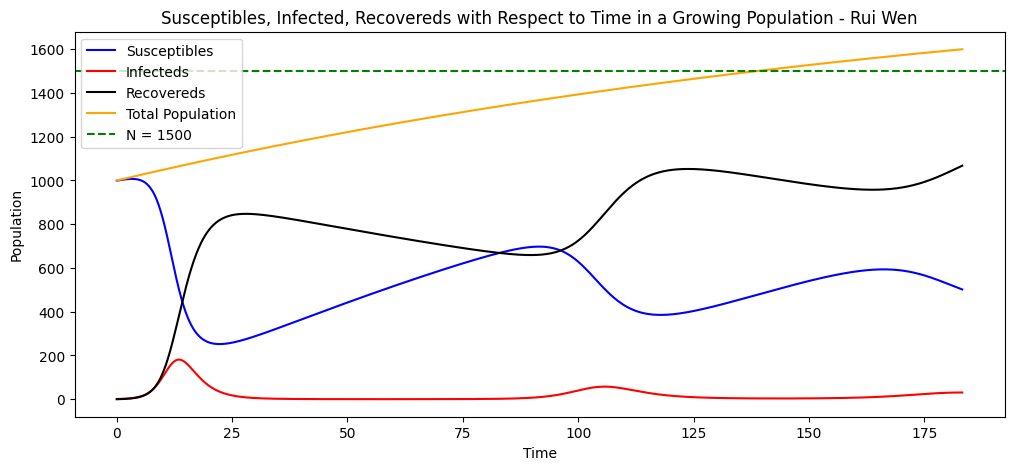

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
plt=reload(plt)

def SIR_birthdeath(S0,I0,R0, beta, gamma, mu_deaths, mu_births, t_max, stepsize, stop_pop_drop):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N_arr = np.zeros(len(T))
    N_max = stop_pop_drop
    N = S0+I0+R0

    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N_arr[idx] = S0 + I0 + R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N - mu_deaths*S[idx-1] + mu_births*N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1] - mu_deaths*I[idx-1]
            dR_dt = gamma * I[idx-1] - mu_deaths*R[idx-1]

            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
            N_arr[idx] = S[idx] + I[idx] + R[idx]

        if N_arr[idx] >= N_max:
            return S[:idx + 1], I[:idx + 1], R[:idx + 1], N_arr[:idx + 1], T[:idx + 1]

    if (S[-1] + I[-1] + R[-1]) < N_max:
        print ("Increase T Max, insufficient population.")
        return 0, 0, 0, 0, 0

    return S, I, R, N_arr, T

# def SIR_birthdeath(S0,I0,R0, beta, gamma, mu_deaths, mu_births, t_max, stepsize):

fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(12,5))
beta = 1
gamma = 0.5
mu_births = 0.01
mu_deaths = mu_births / 2
max_t = 500

S, I, R, N, T = SIR_birthdeath(999, 1, 0, beta, gamma, mu_deaths, mu_births, max_t, 0.05, 1600)
axs.plot(T, S, color='blue', label='Susceptibles')
axs.plot(T, I, color='red', label='Infecteds')
axs.plot(T, R, color='black', label='Recovereds')
axs.plot(T, N, color='orange', label='Total Population')
axs.axhline(y=1500, color='green', linestyle='dashed', label="N = 1500")
plt.title("Susceptibles, Infected, Recovereds with Respect to Time in a Growing Population - Rui Wen")
axs.set_xlabel('Time')
axs.set_ylabel('Population')
axs.legend()

/tmp/ipython-input-587237318.py:32: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  intersection, = fsolve(lambda r: func_f(r) - func_g(r, R0), x0=0.5)


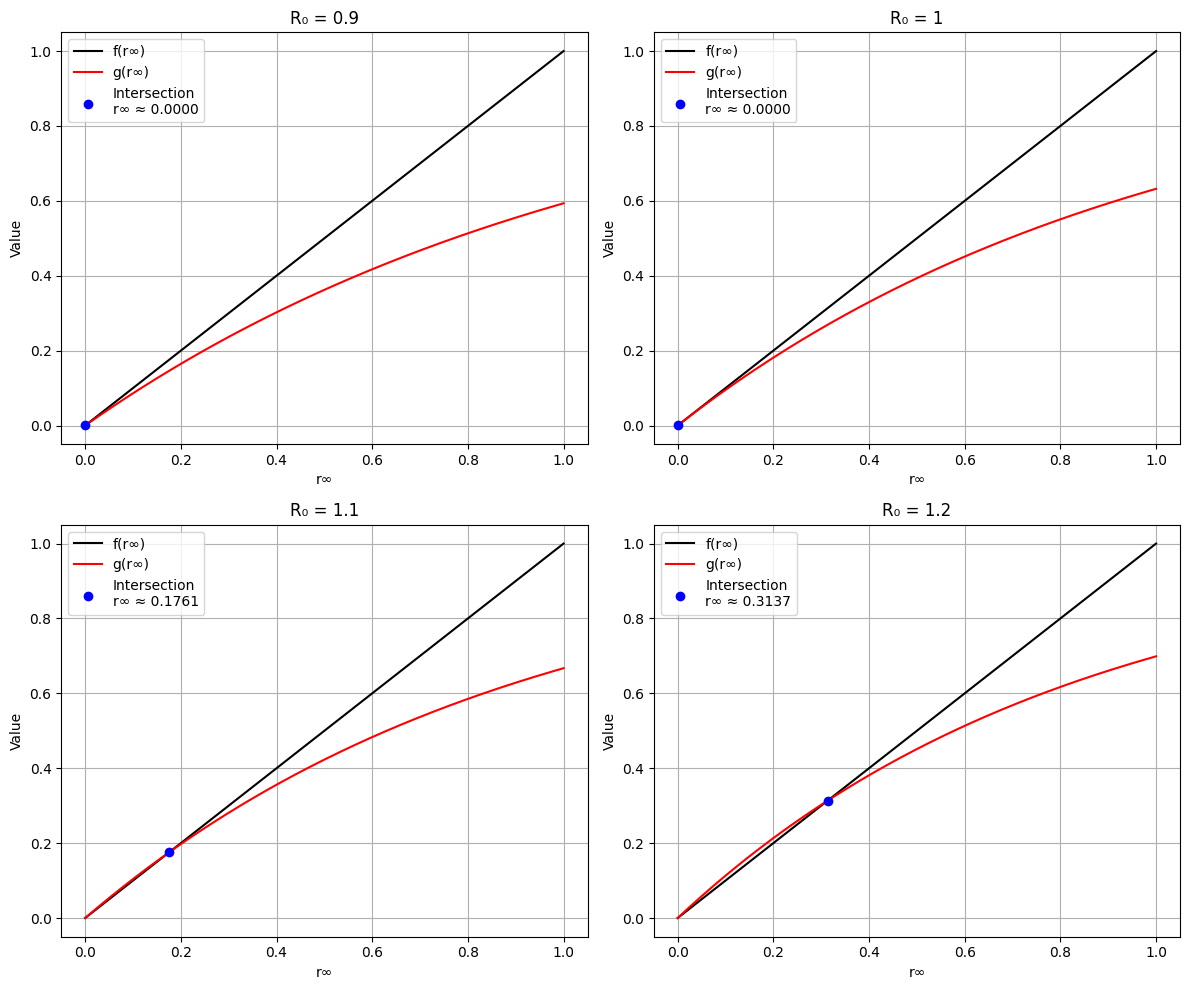

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math

intersections = []

def func_f (r_inf):
    return r_inf

def func_g (r_nought, r_inf):
    return 1 - math.e ** (- r_nought * r_inf)

r_nought_arr = [0.9, 1, 1.1, 1.2]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

r_vals = np.linspace(0, 1, 500)

for i, R0 in enumerate(r_nought_arr):
    ax = axs[i]

    # Plot f
    ax.plot(r_vals, func_f(r_vals), 'k-', label='f(r∞)')

    # Plot g
    g_vals = func_g(r_vals, R0)
    ax.plot(r_vals, g_vals, 'r-', label='g(r∞)')

    # Use fsolve to find intersection point
    intersection, = fsolve(lambda r: func_f(r) - func_g(r, R0), x0=0.5)
    intersections.append(intersection)
    ax.scatter(intersection, func_f(intersection), color='blue', zorder=5, label=f'Intersection\nr∞ ≈ {intersection:.4f}')

    ax.set_title(f'R₀ = {R0}')
    ax.set_xlabel('r∞')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

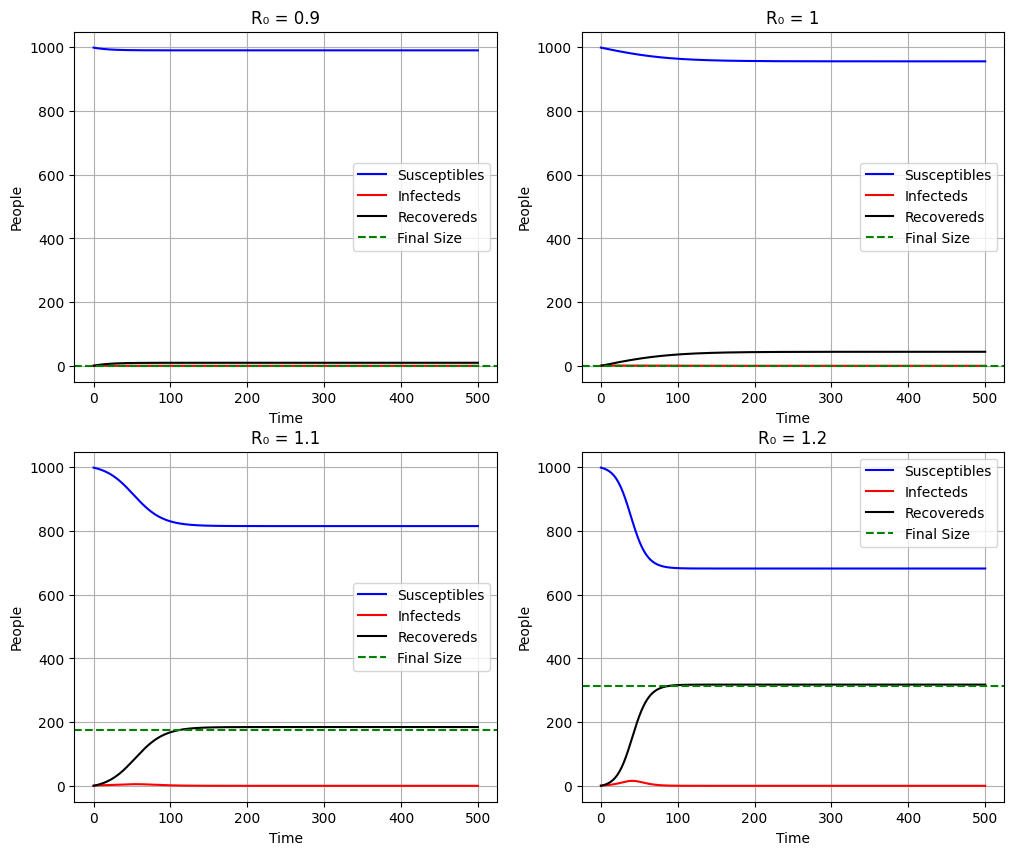

In [14]:
# Not relevant to homework problem set, more so just a self-experiment of confirmation of R0.
def SIR(S0, I0, R0, beta, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0

    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]
            dR_dt = gamma * I[idx-1]

            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize

    return S, I, R, T, N

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Plot each SIR model
for i, R_nought in enumerate(r_nought_arr):
    ax = axs[i]

    beta = R_nought * 0.5  # beta = R0 * gamma
    gamma = 0.5

    S, I, R, T, N = SIR(999, 1, 0, beta, gamma, 500, 0.05)

    ax.plot(T, S, color='b', label='Susceptibles')
    ax.plot(T, I, color='r', label='Infecteds')
    ax.plot(T, R, color='k', label='Recovereds')

    final_size = N * intersections[i]
    ax.axhline(y=final_size, color='green', linestyle='dashed', label='Final Size')

    ax.set_title(f'R₀ = {R_nought}')
    ax.set_xlabel('Time')
    ax.set_ylabel('People')
    ax.legend()
    ax.grid(True)


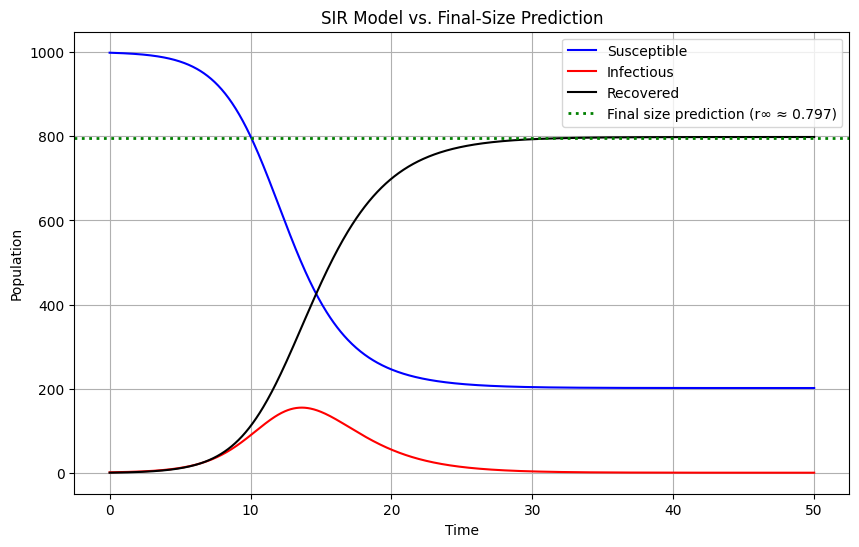

In [16]:
# Final-size equation
def final_size_eq(r, R0):
    return r - (1 - math.e ** (-R0 * r))

beta = 1
gamma = 0.5
# R0 value calculation
R0 = beta / gamma

# Solve for r_infinity using fsolve
r_inf_guess = 0.5
r_inf = fsolve(final_size_eq, r_inf_guess, args=(R0))[0]

# Simulate SIR
S0, I0, R0_start = 999, 1, 0
S, I, R, T, N = SIR(S0, I0, R0_start, beta, gamma, 50, 0.05)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(T, S, label='Susceptible', color='blue')
plt.plot(T, I, label='Infectious', color='red')
plt.plot(T, R, label='Recovered', color='black')

# Add predicted final size line
R_inf_predicted = N * r_inf
plt.axhline(y=R_inf_predicted, color='green', linestyle='dotted', linewidth=2, label=f'Final size prediction (r∞ ≈ {r_inf:.3f})')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIR Model vs. Final-Size Prediction')
plt.legend()
plt.grid(True)
plt.show()

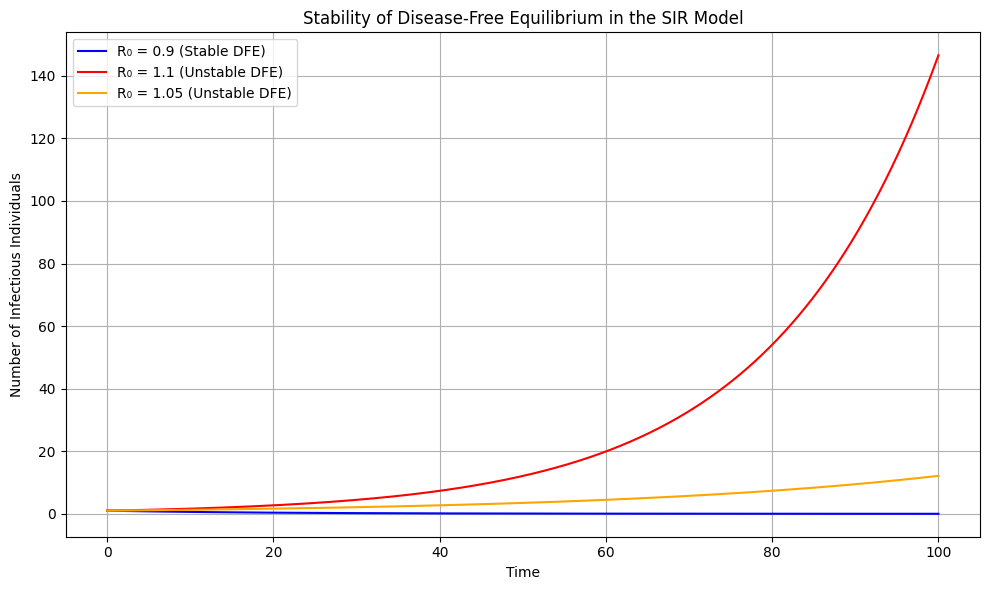

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# SIR model function
def SIR(S0, I0, R0_start, beta, gamma, t_max, stepsize):
    T = np.arange(0, t_max + stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0 + I0 + R0_start

    for idx, t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0_start
        else:
            dS = -beta * S[idx - 1] * I[idx - 1] / N
            dI = beta * S[idx - 1] * I[idx - 1] / N - gamma * I[idx - 1]
            dR = gamma * I[idx - 1]

            S[idx] = S[idx - 1] + dS * stepsize
            I[idx] = I[idx - 1] + dI * stepsize
            R[idx] = R[idx - 1] + dR * stepsize

    return S, I, R, T

# Constants
N = 10**6
epsilon = 1 / N
I0 = epsilon
S0 = N - I0
R0_start = 0
gamma = 0.5
t_max = 100
stepsize = 0.1

# Case 1: R0 < 1 (stable)
R0_stable = 0.9
beta_stable = R0_stable * gamma
S_s, I_s, R_s, T = SIR(S0, I0, R0_start, beta_stable, gamma, t_max, stepsize)

# Case 2: R0 > 1 (unstable)
R0_unstable = 1.1
beta_unstable = R0_unstable * gamma
S_u, I_u, R_u, _ = SIR(S0, I0, R0_start, beta_unstable, gamma, t_max, stepsize)

# Case 3: R0 > 1 (unstable)
R0_unstable_2 = 1.05
beta_unstable_2 = R0_unstable_2 * gamma
S_u2, I_u2, R_u2, _ = SIR(S0, I0, R0_start, beta_unstable_2, gamma, t_max, stepsize)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T, I_s * N, label='R₀ = 0.9 (Stable DFE)', color='blue')
plt.plot(T, I_u * N, label='R₀ = 1.1 (Unstable DFE)', color='red')
plt.plot(T, I_u2 * N, label='R₀ = 1.05 (Unstable DFE)', color='orange')
plt.xlabel('Time')
plt.ylabel('Number of Infectious Individuals')
plt.title('Stability of Disease-Free Equilibrium in the SIR Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# SIR function (same as before)
def SIR_imax(S0, I0, R0, beta, gamma, t_max, stepsize):
    T = np.arange(0, t_max + stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0 + I0 + R0

    imax = 0

    for idx, t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            dS = -beta * S[idx - 1] * I[idx - 1] / N
            dI = beta * S[idx - 1] * I[idx - 1] / N - gamma * I[idx - 1]
            dR = gamma * I[idx - 1]

            S[idx] = S[idx - 1] + dS * stepsize
            I[idx] = I[idx - 1] + dI * stepsize

            if I[idx] > imax :
                imax = I[idx]

            R[idx] = R[idx - 1] + dR * stepsize

    return imax, S0 / (S0 + I0 + R0)


N = 10 ** 6
epsilon = 1 / N
I0 = epsilon

Rnought = 2.5

gamma = 1 / 10
beta = Rnought * gamma

s_values = np.linspace(0.0, 1, 50)

imax_list = []
s_list = []

for s_val in s_values:
    S0 = s_val * N
    I0 = epsilon * N
    R0_init = N - S0 - I0

    imax_temp, s_temp = SIR_imax(S0, I0, R0_init, beta, gamma, 100, 0.05)

    imax_list.append(imax_temp)
    s_list.append(s_temp)

In [49]:
imax_list

[np.float64(0.995),
 np.float64(0.9952551020408164),
 np.float64(0.9955102040816326),
 np.float64(0.995765306122449),
 np.float64(0.9960204081632653),
 np.float64(0.9962755102040817),
 np.float64(0.9965306122448979),
 np.float64(0.9967857142857143),
 np.float64(0.9970408163265306),
 np.float64(0.997295918367347),
 np.float64(0.9975510204081632),
 np.float64(0.9978061224489796),
 np.float64(0.998061224489796),
 np.float64(0.9983163265306122),
 np.float64(0.9985714285714286),
 np.float64(0.9988265306122449),
 np.float64(0.9990816326530613),
 np.float64(0.9993367346938775),
 np.float64(0.9995918367346939),
 np.float64(0.9998469387755102),
 np.float64(1.226217990804965),
 np.float64(2.0421148612257003),
 np.float64(3.40040667977774),
 np.float64(5.661318484986943),
 np.float64(9.424040371665118),
 np.float64(15.685008717899711),
 np.float64(26.10077481433531),
 np.float64(43.42426399613313),
 np.float64(72.22807641560539),
 np.float64(120.10195759087918),
 np.float64(199.63102723062397),
 

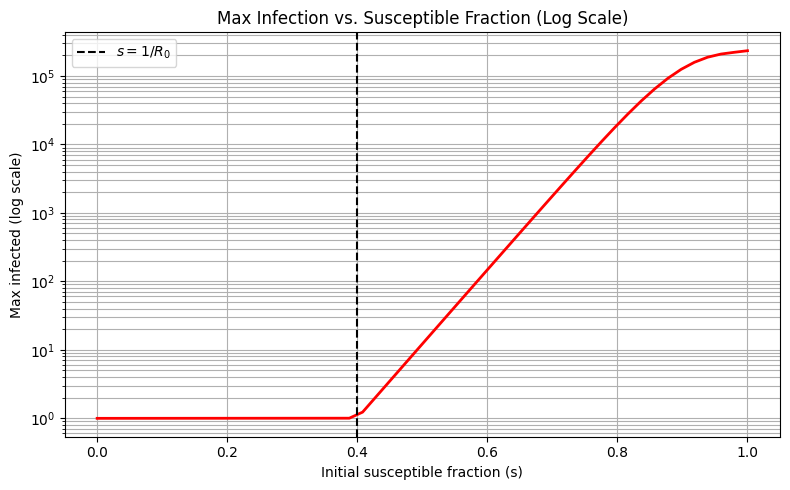

In [55]:
Rnought = 2.5
s_threshold = 1 / Rnought

plt.figure(figsize=(8, 5))
plt.plot(s_list, imax_list, color='red', linewidth=2)
plt.yscale('log')  # Log scale for better dynamic range visualization
plt.xlabel("Initial susceptible fraction (s)")
plt.ylabel("Max infected (log scale)")
plt.axvline(s_threshold, color='black', linestyle='--', label=r'$s = 1/R_0$')
plt.title("Max Infection vs. Susceptible Fraction (Log Scale)")
plt.legend()
plt.grid(True, which='both')
plt.tight_layout()
plt.show()